In [80]:
%pip install openpyxl


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip3.11 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
# Read in the GSS data from an excel sheet
gss = pd.read_excel("GSS.xlsx")
gss = gss.drop(columns=["id_"])

In [83]:
# Rename our columns to better describe the data
rename = {"marital":"Marital Status", "educ": "Years of Education", "realinc":"Family Income", "polviews": "Political Views", "partyid":"Political Party", "happy":"General Happiness", "attend":"Religious Service Attendance"}
gss = gss.rename(columns=rename)

In [84]:
# Take an initial look at our data by printing the value counts/describing our columns
gss_num = gss.select_dtypes(include=np.number)
gss_cat = gss.select_dtypes(include=['object'])

for num in gss_num:
    print(gss_num[num].describe())

for cat in gss_cat:
    print(gss_cat[cat].value_counts())

count    72390.000000
mean      1997.715541
std         15.109995
min       1972.000000
25%       1985.000000
50%       1998.000000
75%       2010.000000
max       2022.000000
Name: year, dtype: float64
count     72390.000000
mean      29114.358854
std       30331.767376
min        -100.000000
25%        8417.500000
50%       21299.000000
75%       38373.750000
max      162607.000000
Name: Family Income, dtype: float64
Marital Status
Married                           37596
Never married                     15904
Divorced                           9642
Widowed                            6756
Separated                          2441
.n:  No answer                       37
.s:  Skipped on Web                  12
.d:  Do not Know/Cannot Choose        2
Name: count, dtype: int64
age
30                                1571
32                                1566
34                                1552
28                                1548
33                                1526
                 

The dataset chosen offers a blend of demographic, socioeconomic, and other trend variables that provide a snapshot of US respondents over time. It includes survey year, which spans from 1972 to 2022, allowing examination of changes and trends across decades. Key socioeconomic indicators such as family income and education help us view economic well being and social mobility, which age and marital status add context regarding life outside of numbers. Demographic details like sex or race help show subgroup differences, and political dimensions are shown through political views and party. This can offer insights into partisanship and leanings in relation to other factors. Religious service attendance can look into how religious a person is, which may correlate with various social, political, or economic factors. General happiness provides a measure of well being, showing how an exploration of these factors can influence overall life satisfaction.

In [85]:
# Define missing value codes used in categorical columns
missing_codes = ['.n:  No answer', '.s:  Skipped on Web', '.d:  Do not Know/Cannot Choose', '.i:  Inapplicable']
# Replace missing codes in all object (categorical) columns with np.nan
gss_cat_cols = gss.select_dtypes(include=['object']).columns
for col in gss_cat_cols:
    gss[col] = gss[col].replace(missing_codes, np.nan)

In [86]:
# Check Family Income numeric column for placeholder/missing values (-100)
if 'Family Income' in gss.columns:
    gss['Family Income'] = gss['Family Income'].replace(-100, np.nan)

In [87]:
# Convert 'year' to integer if it's not already
if gss['year'].dtype != 'int64':
    gss['year'] = gss['year'].astype(int)

In [88]:
# standardize the 'sex' column capitalization for consistency
if 'sex' in gss.columns:
    gss['sex'] = gss['sex'].str.capitalize()

In [106]:
# Replace '89 or older' with 90
gss['age'] = gss['age'].replace('89 or older', 90)

# Convert the column to numeric, coercing invalid entries to NaN
gss['age'] = pd.to_numeric(gss['age'], errors='coerce')

In [107]:
# Some numerical summaries for both numerical and categorical columns
gss_num = gss.select_dtypes(include=np.number)
gss_cat = gss.select_dtypes(include=['object'])

for num in gss_num:
    print(gss_num[num].describe())

for cat in gss_cat:
    print(gss_cat[cat].value_counts())

count    72390.000000
mean      1997.715541
std         15.109995
min       1972.000000
25%       1985.000000
50%       1998.000000
75%       2010.000000
max       2022.000000
Name: year, dtype: float64
count    71621.000000
mean        46.561693
std         17.614344
min         18.000000
25%         32.000000
50%         44.000000
75%         60.000000
max         90.000000
Name: age, dtype: float64
count     64912.000000
mean      32479.914922
std       30271.345060
min         204.500000
25%       12080.625000
50%       24395.000000
75%       40900.000000
max      162607.000000
Name: Family Income, dtype: float64
Marital Status
Married          37596
Never married    15904
Divorced          9642
Widowed           6756
Separated         2441
Name: count, dtype: int64
Years of Education
12th grade                    21401
4 years of college             9994
2 years of college             8208
1 year of college              5905
11th grade                     3942
3 years of college  

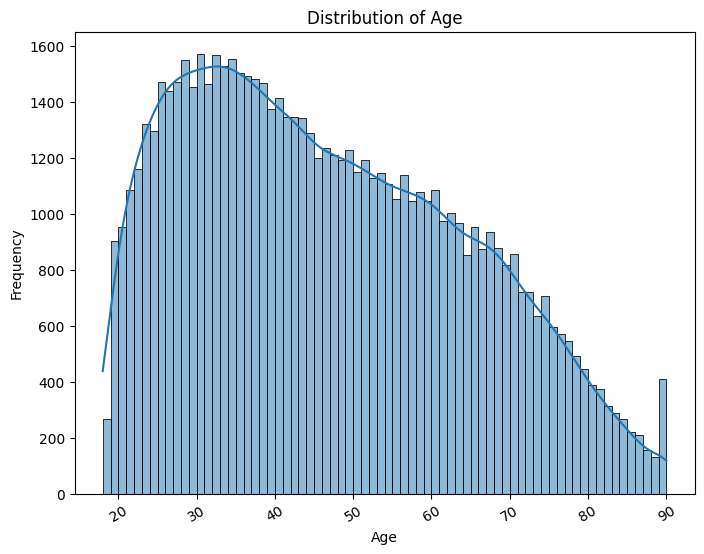

In [111]:
# Histogram of Age
plt.figure(figsize=(8,6))
sns.histplot(gss['age'].dropna(), bins=range(18, 91), kde=True)
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.xticks(rotation=30)
plt.show()

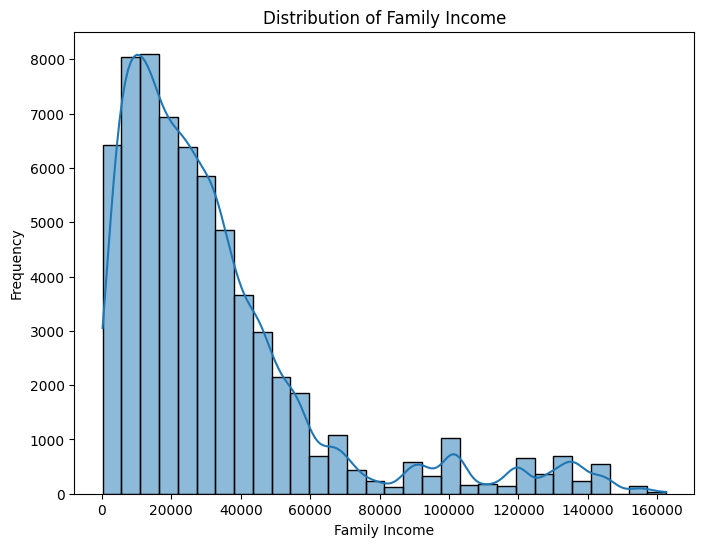

In [112]:
# Histogram of Family Income
plt.figure(figsize=(8,6))
sns.histplot(gss['Family Income'].dropna(), bins=30, kde=True)
plt.title("Distribution of Family Income")
plt.xlabel("Family Income")
plt.ylabel("Frequency")
plt.show()

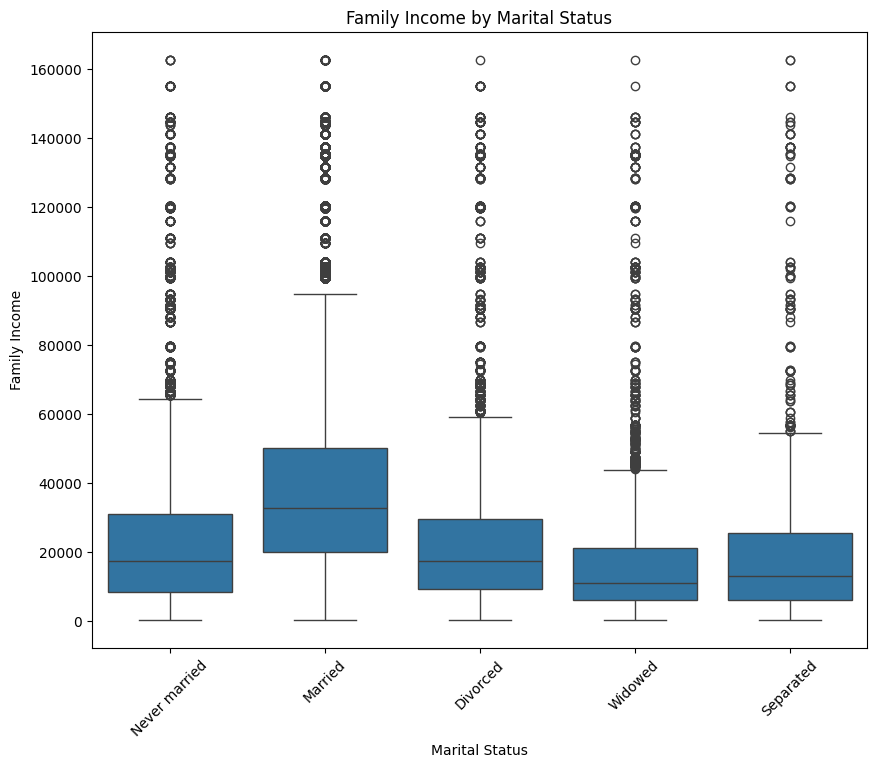

In [113]:
# Boxplot of Family Income by Marital Status
plt.figure(figsize=(10,8))
sns.boxplot(x='Marital Status', y='Family Income', data=gss)
plt.title("Family Income by Marital Status")
plt.xlabel("Marital Status")
plt.ylabel("Family Income")
plt.xticks(rotation=45)
plt.show()

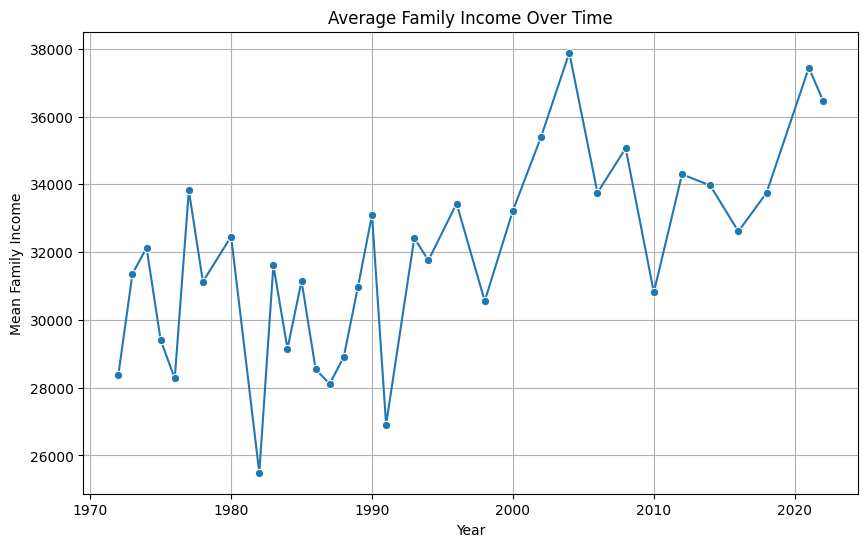

In [115]:
# 1. Average Family Income Over Time
income_by_year = gss.groupby('year')['Family Income'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=income_by_year, x='year', y='Family Income', marker='o')
plt.title('Average Family Income Over Time')
plt.xlabel('Year')
plt.ylabel('Mean Family Income')
plt.grid(True)
plt.show()

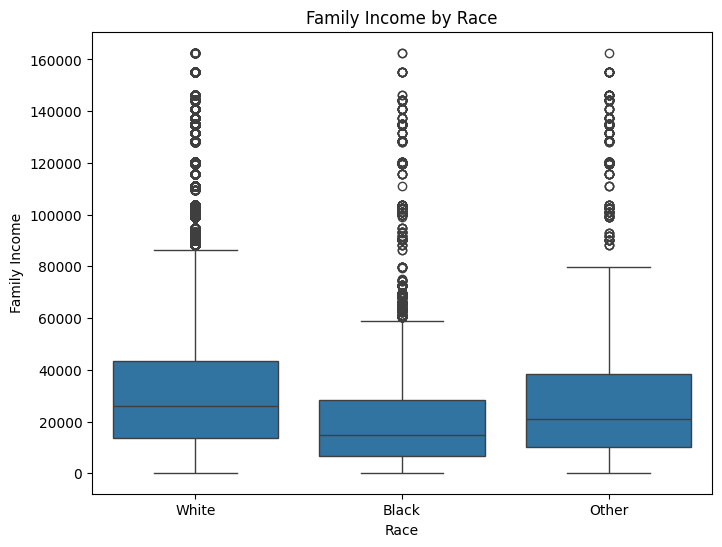

In [116]:
# family income by race
plt.figure(figsize=(8, 6))
sns.boxplot(data=gss, x='race', y='Family Income')
plt.title('Family Income by Race')
plt.xlabel('Race')
plt.ylabel('Family Income')
plt.show()


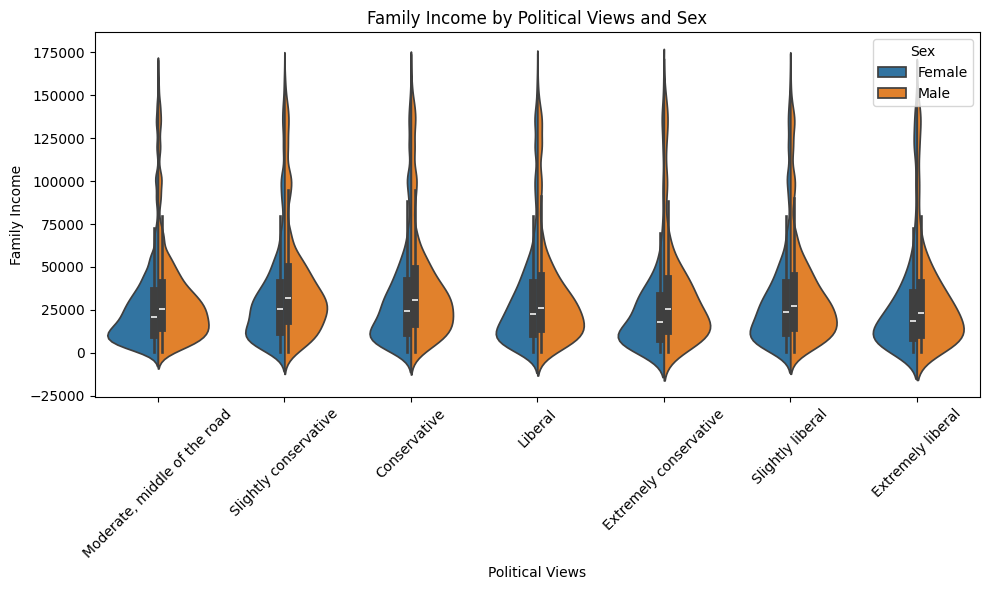

In [118]:
# family income by political views & sex
plt.figure(figsize=(10, 6))
sns.violinplot(
    data=gss, 
    x='Political Views', 
    y='Family Income', 
    hue='sex', 
    split=True
)
plt.title('Family Income by Political Views and Sex')
plt.xlabel('Political Views')
plt.ylabel('Family Income')
plt.xticks(rotation=45) 
plt.legend(title='Sex')
plt.tight_layout()
plt.show()


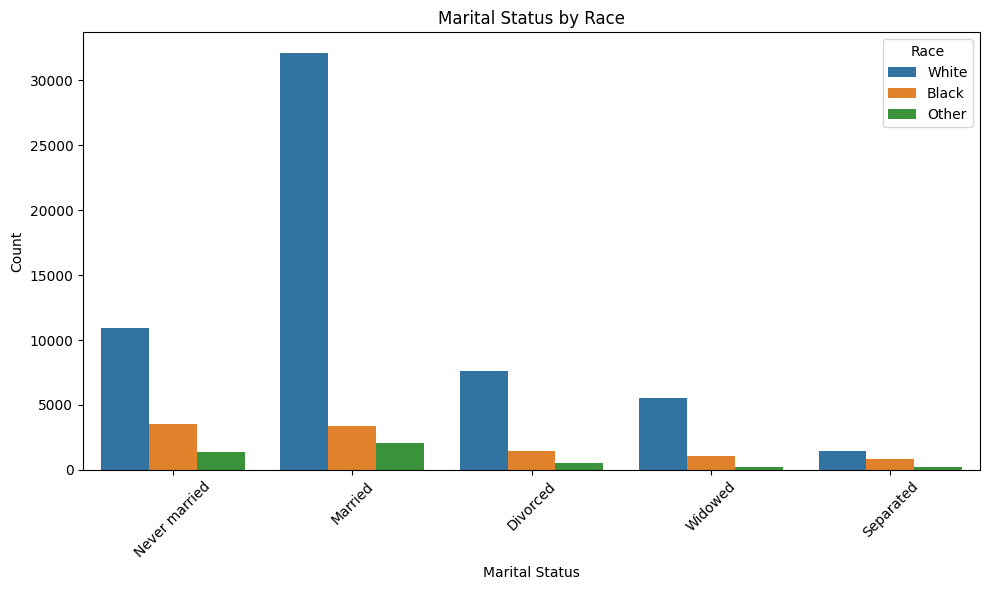

In [ ]:
# Marital status by race
plt.figure(figsize=(10, 6))
sns.countplot(data=gss, x='Marital Status', hue='race')
plt.title('Marital Status by Race')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Race')
plt.tight_layout()
plt.show()


#### Age Distribution

The histogram of age, shows that the GSS sample skews towards adults in their late 20s to mid 30s. As age increases, the frequency gradually declines. When we reach older adults, the counts diminish sharply, reflecting typical population demographics and the lower likelihood of older people participating in surveys (online most likely).

#### Family Income Distribution

Family income displays a right-skew, as a large share of respondents report incomes in the lower to mid ranges (\<$40,000), with fewwer respondents in higher income brackets. This pattern is typical for income data, as a smaller portion of the population earns well above the median. The tail extends past \$100,000, indicating some high-income outliers.

#### Family income by Marital Status

The boxplot reveals that married respondents typically report higher median incomes than other groups. "Never Married" individuals show a lower median income, which may reflect factors like single-income homes or younger average age. Widowed, divorced, and separated respondents also cluster below the median income for married respondents, but with considerable overlap and outliers across all groups. This suggests that marital status can be a key factor in economic prosperity.

#### Age vs Family Income

The scatter plot of age versus family income exhibits a broad spread with a slight upward trend: younger respondents cluster around lower incomes, while incomes generally rise for those in their 30s to 50s. Beyond a certain age, the data points are widely dispersed, indicating that while income tends to increase with age (up to a point), there is substantial individual variation. Some older respondents report relatively low incomes, possibly due to retirement, whereas others maintain higher earnings.

#### Average Family Income Over Time

Looking at the mean family income from 1972 to 2022, we see fluctuation but an overall upward trajectory. Certain economic periods—such as the early 1980s and the late 2000s—show dips, potentially reflecting recessions or broader economic downturns. Conversely, peaks around the early 2000s and mid-2010s may correlate with periods of economic expansion. This trend underscores the impact of macroeconomic forces on household income over several decades.

#### Family Income by Race

The boxplot grouped by race indicates notable differences in median income. White respondents typically report the highest median family income, followed by those categorized as “Other,” and then Black respondents. While there is overlap between groups (and some high-income outliers in each), the gap in medians suggests that racial disparities in income persist over time.

#### Family Income by Political Views and Sex

The violin plot demonstrates how family income distributions vary by both political views and respondent sex. Across most political categories, male respondents appear to have slightly higher median incomes than female respondents, though the extent of this gap differs among ideological groups. Some categories (ex., “Extremely conservative,” “Extremely liberal”) have smaller sample sizes, resulting in narrower violins and possibly less stable estimates. Nonetheless, these patterns suggest relationships of gender, ideology, and socioeconomic status.

#### Marital Status by Race

Finally, the countplot of marital status by race shows that “Married” is the most common status across all groups, but the proportion of married respondents differs by race. For example, White respondents have a noticeably larger married segment compared to Black respondents. “Never married” also varies in frequency, which can be tied to age distributions, cultural factors, and socioeconomic variables within each racial group.